In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read data
filename = 'hw1_eda_data.csv'
df = pd.read_csv(filename)
df= df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [4]:
df.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 32 columns]

In [5]:
# Shape of DataFile
df.shape

(569, 32)

In [6]:
# Base Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [7]:
#Set target variables and data Base Statistics
tarVar = df.diagnosis.to_frame();
data = df.drop(['id','diagnosis'], axis = 1)
data.describe(percentiles = [0.1, 0.25, 0.75, 0.9])

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
10%      10.260000     14.078000       65.830000   321.600000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
90%      19.530000     24.992000      129.100000  1177.400000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
10%           0.079654          0.049700        0.013686             0.011158   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
90%           0.114820          0.175460        0.203040             0.100420   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
10%         0.149580                0.055338  ...     11.234000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
90%         0.214940                0.072266  ...     23.682000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
10%        17.800000        72.178000   384.720000          0.102960   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
90%        33.646000       157.740000  1673.000000          0.161480   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
10%             0.093676         0.045652              0.038460   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
90%             0.447840         0.571320              0.208940   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076           

In [8]:
# Number of Malignant and Benign (may be important for likelihood)
B, M = tarVar.diagnosis.value_counts()
print('Malignant Benign: ',M)
print('Benign Number: ',B)

Malignant Benign:  212
Benign Number:  357


In [10]:
# We scale our data so that they are the same dimension
dataNorm = (data - data.mean()) / (data.std()) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

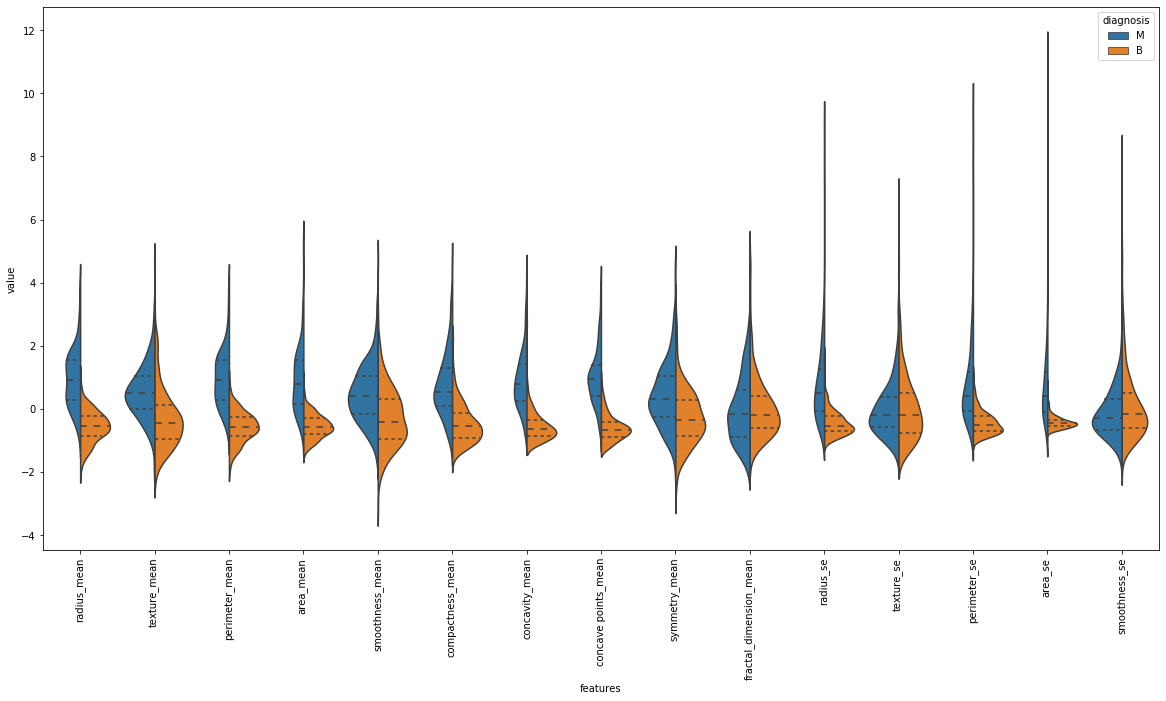

In [11]:
# Plot Histogramms [0:15]
dataVar = pd.concat([tarVar.diagnosis,dataNorm.iloc[:,0: 15]],axis=1)
dataVar = pd.melt(dataVar,id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(20,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=dataVar,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

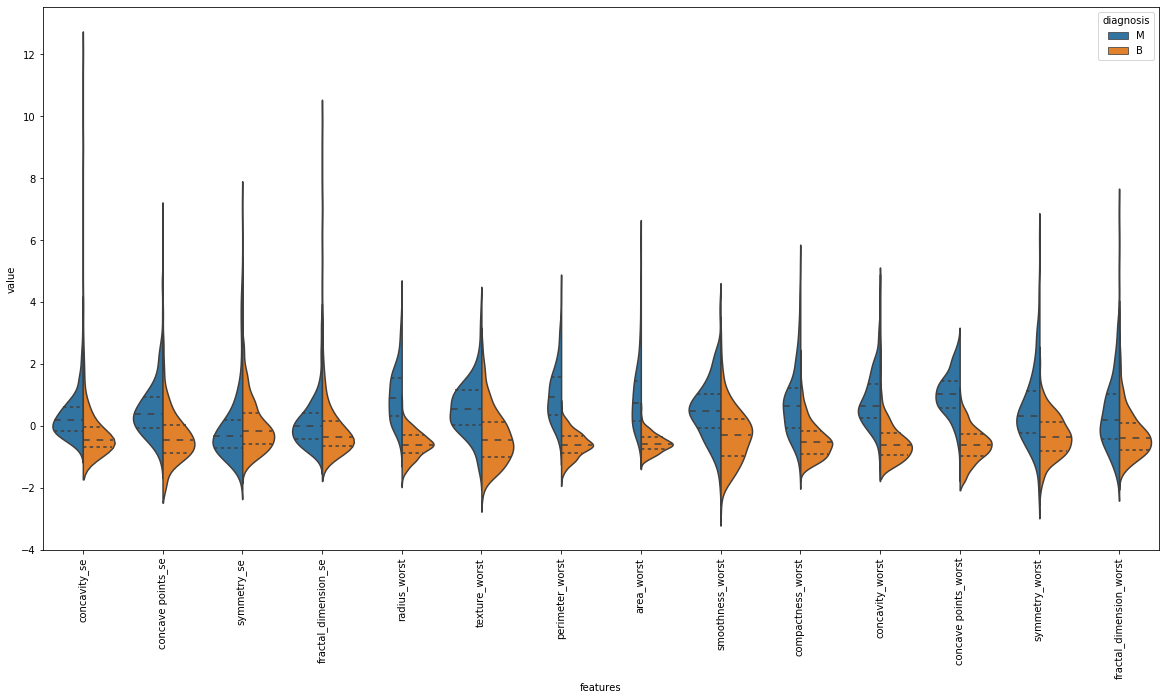

In [12]:
# Plot Histogramms [16:31]
dataVar = pd.concat([tarVar.diagnosis,dataNorm.iloc[:,16: 31]],axis=1)
dataVar = pd.melt(dataVar,id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(20,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=dataVar,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

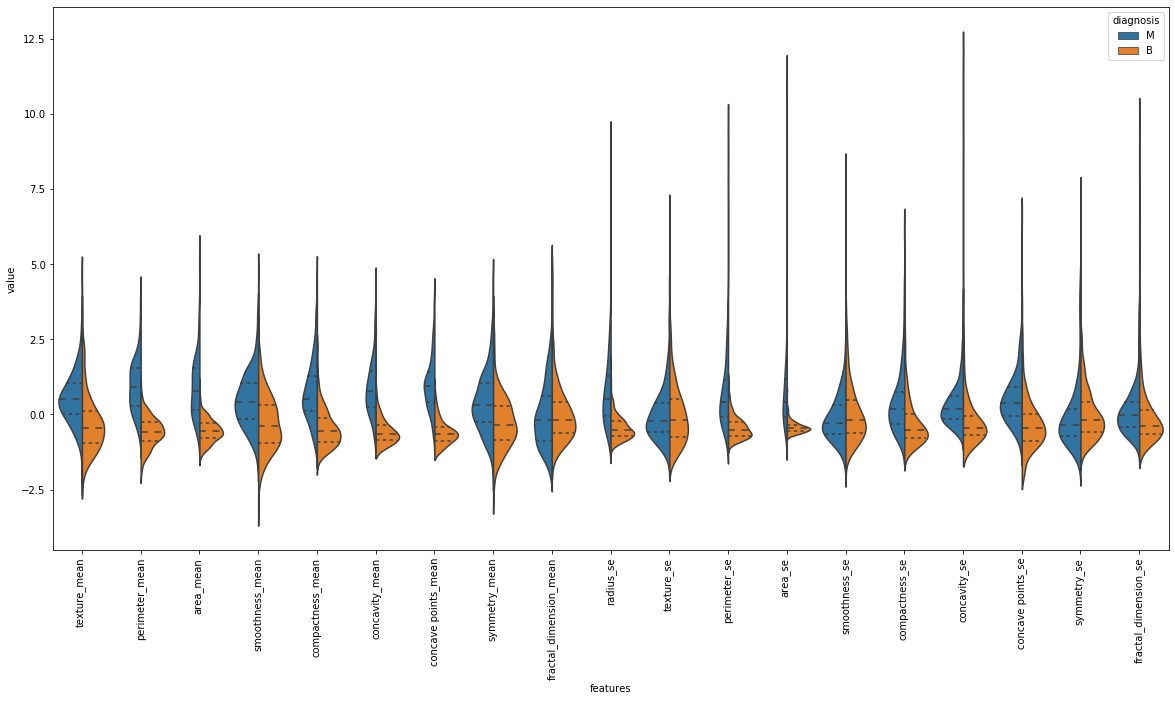

In [13]:
# Plot Histogramms [10:20]
dataVar = pd.concat([tarVar.diagnosis,dataNorm.iloc[:,1: 20]],axis=1)
dataVar = pd.melt(dataVar,id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(20,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=dataVar,split=True, inner="quart")
plt.xticks(rotation=90)

In [14]:
# Column correlation calculation
Corr = data.dropna().corr()

In [15]:
#  Find pairs of signs with a correlation greater than 0.6
CorField = []
for i in Corr:
    for j in Corr.index[Corr[i] > 0.6]:
        if i != j and j not in CorField and i not in CorField:
            CorField.append(j)
            print (i, j, Corr[i][Corr.index == j].values[0])
print('The number of strongly correlated features of the sample = ', len(CorField))

radius_mean perimeter_mean 0.9978552814938113
radius_mean area_mean 0.9873571700566119
radius_mean concavity_mean 0.6767635503908116
radius_mean concave points_mean 0.8225285223871791
radius_mean radius_se 0.6790903880020752
radius_mean perimeter_se 0.6741716157641062
radius_mean area_se 0.7358636632128175
radius_mean radius_worst 0.9695389726112053
radius_mean perimeter_worst 0.9651365139559878
radius_mean area_worst 0.9410824595860459
radius_mean concave points_worst 0.7442141978674656
texture_mean texture_worst 0.9120445888404215
smoothness_mean compactness_mean 0.6591232152159219
smoothness_mean smoothness_worst 0.8053241954943631
symmetry_mean symmetry_worst 0.6998257976437318
fractal_dimension_mean fractal_dimension_se 0.6881315774585518
fractal_dimension_mean fractal_dimension_worst 0.7672967792384351
compactness_se concavity_se 0.8012683427383301
compactness_se concave points_se 0.7440826676953249
compactness_se compactness_worst 0.6787803543724954
compactness_se concavity_wors

(30.0, 0.0)

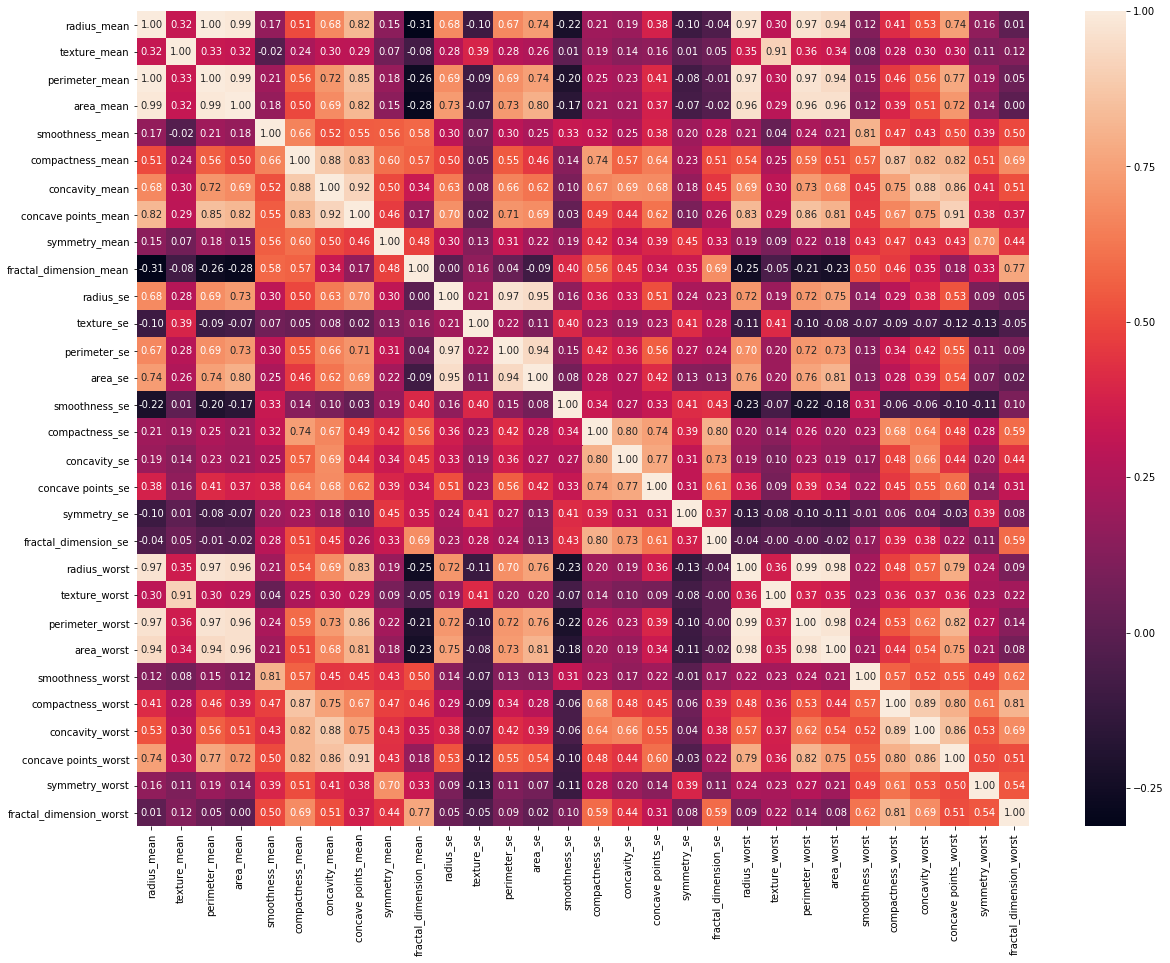

In [16]:
# Draw Big heatMap
plt.figure(figsize=(20,15));
ax=sns.heatmap(Corr, annot=True, fmt='.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(21.0, 0.0)

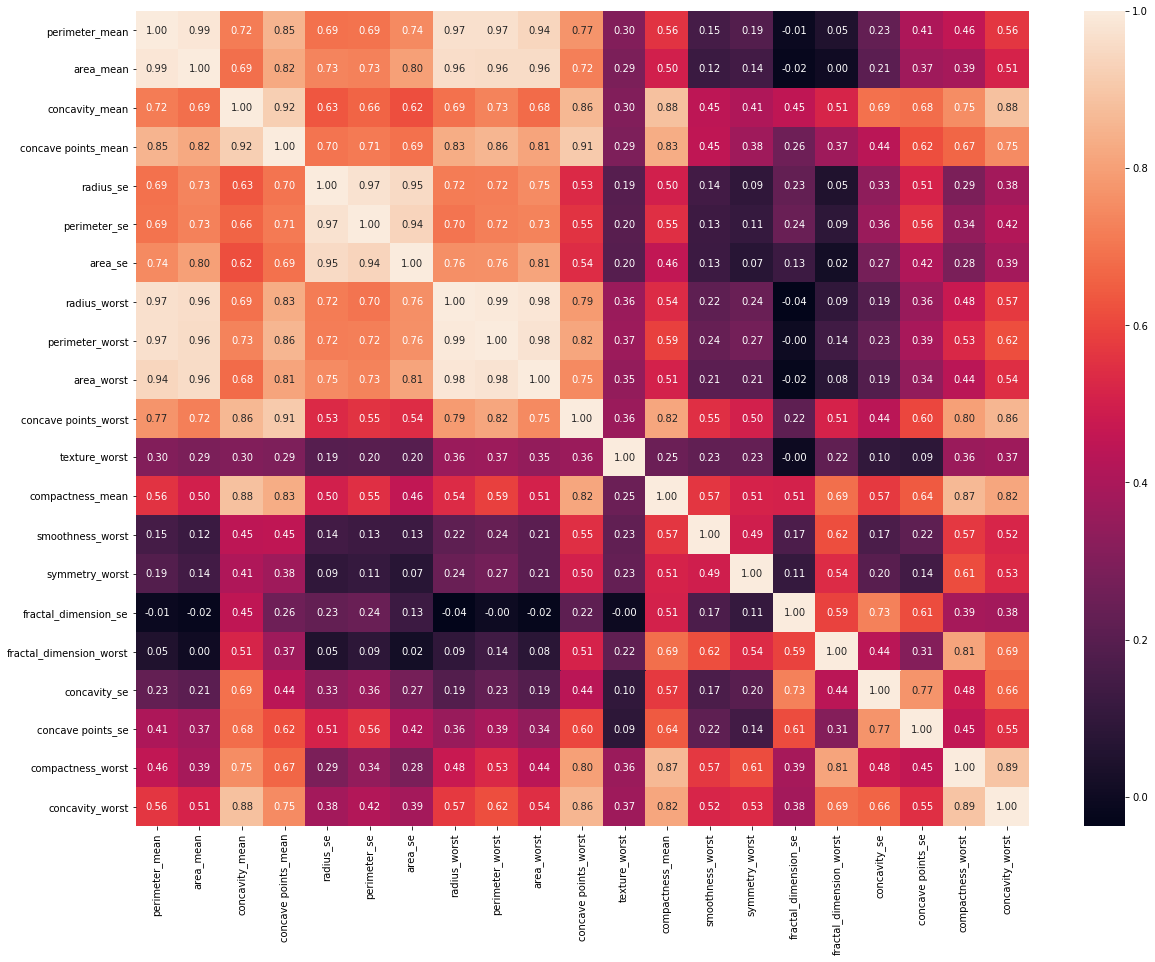

In [17]:
# Draw small HeatMap
Corr =  data[CorField].dropna().corr()
plt.figure(figsize=(20,15));
ax=sns.heatmap(Corr, annot=True, fmt='.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

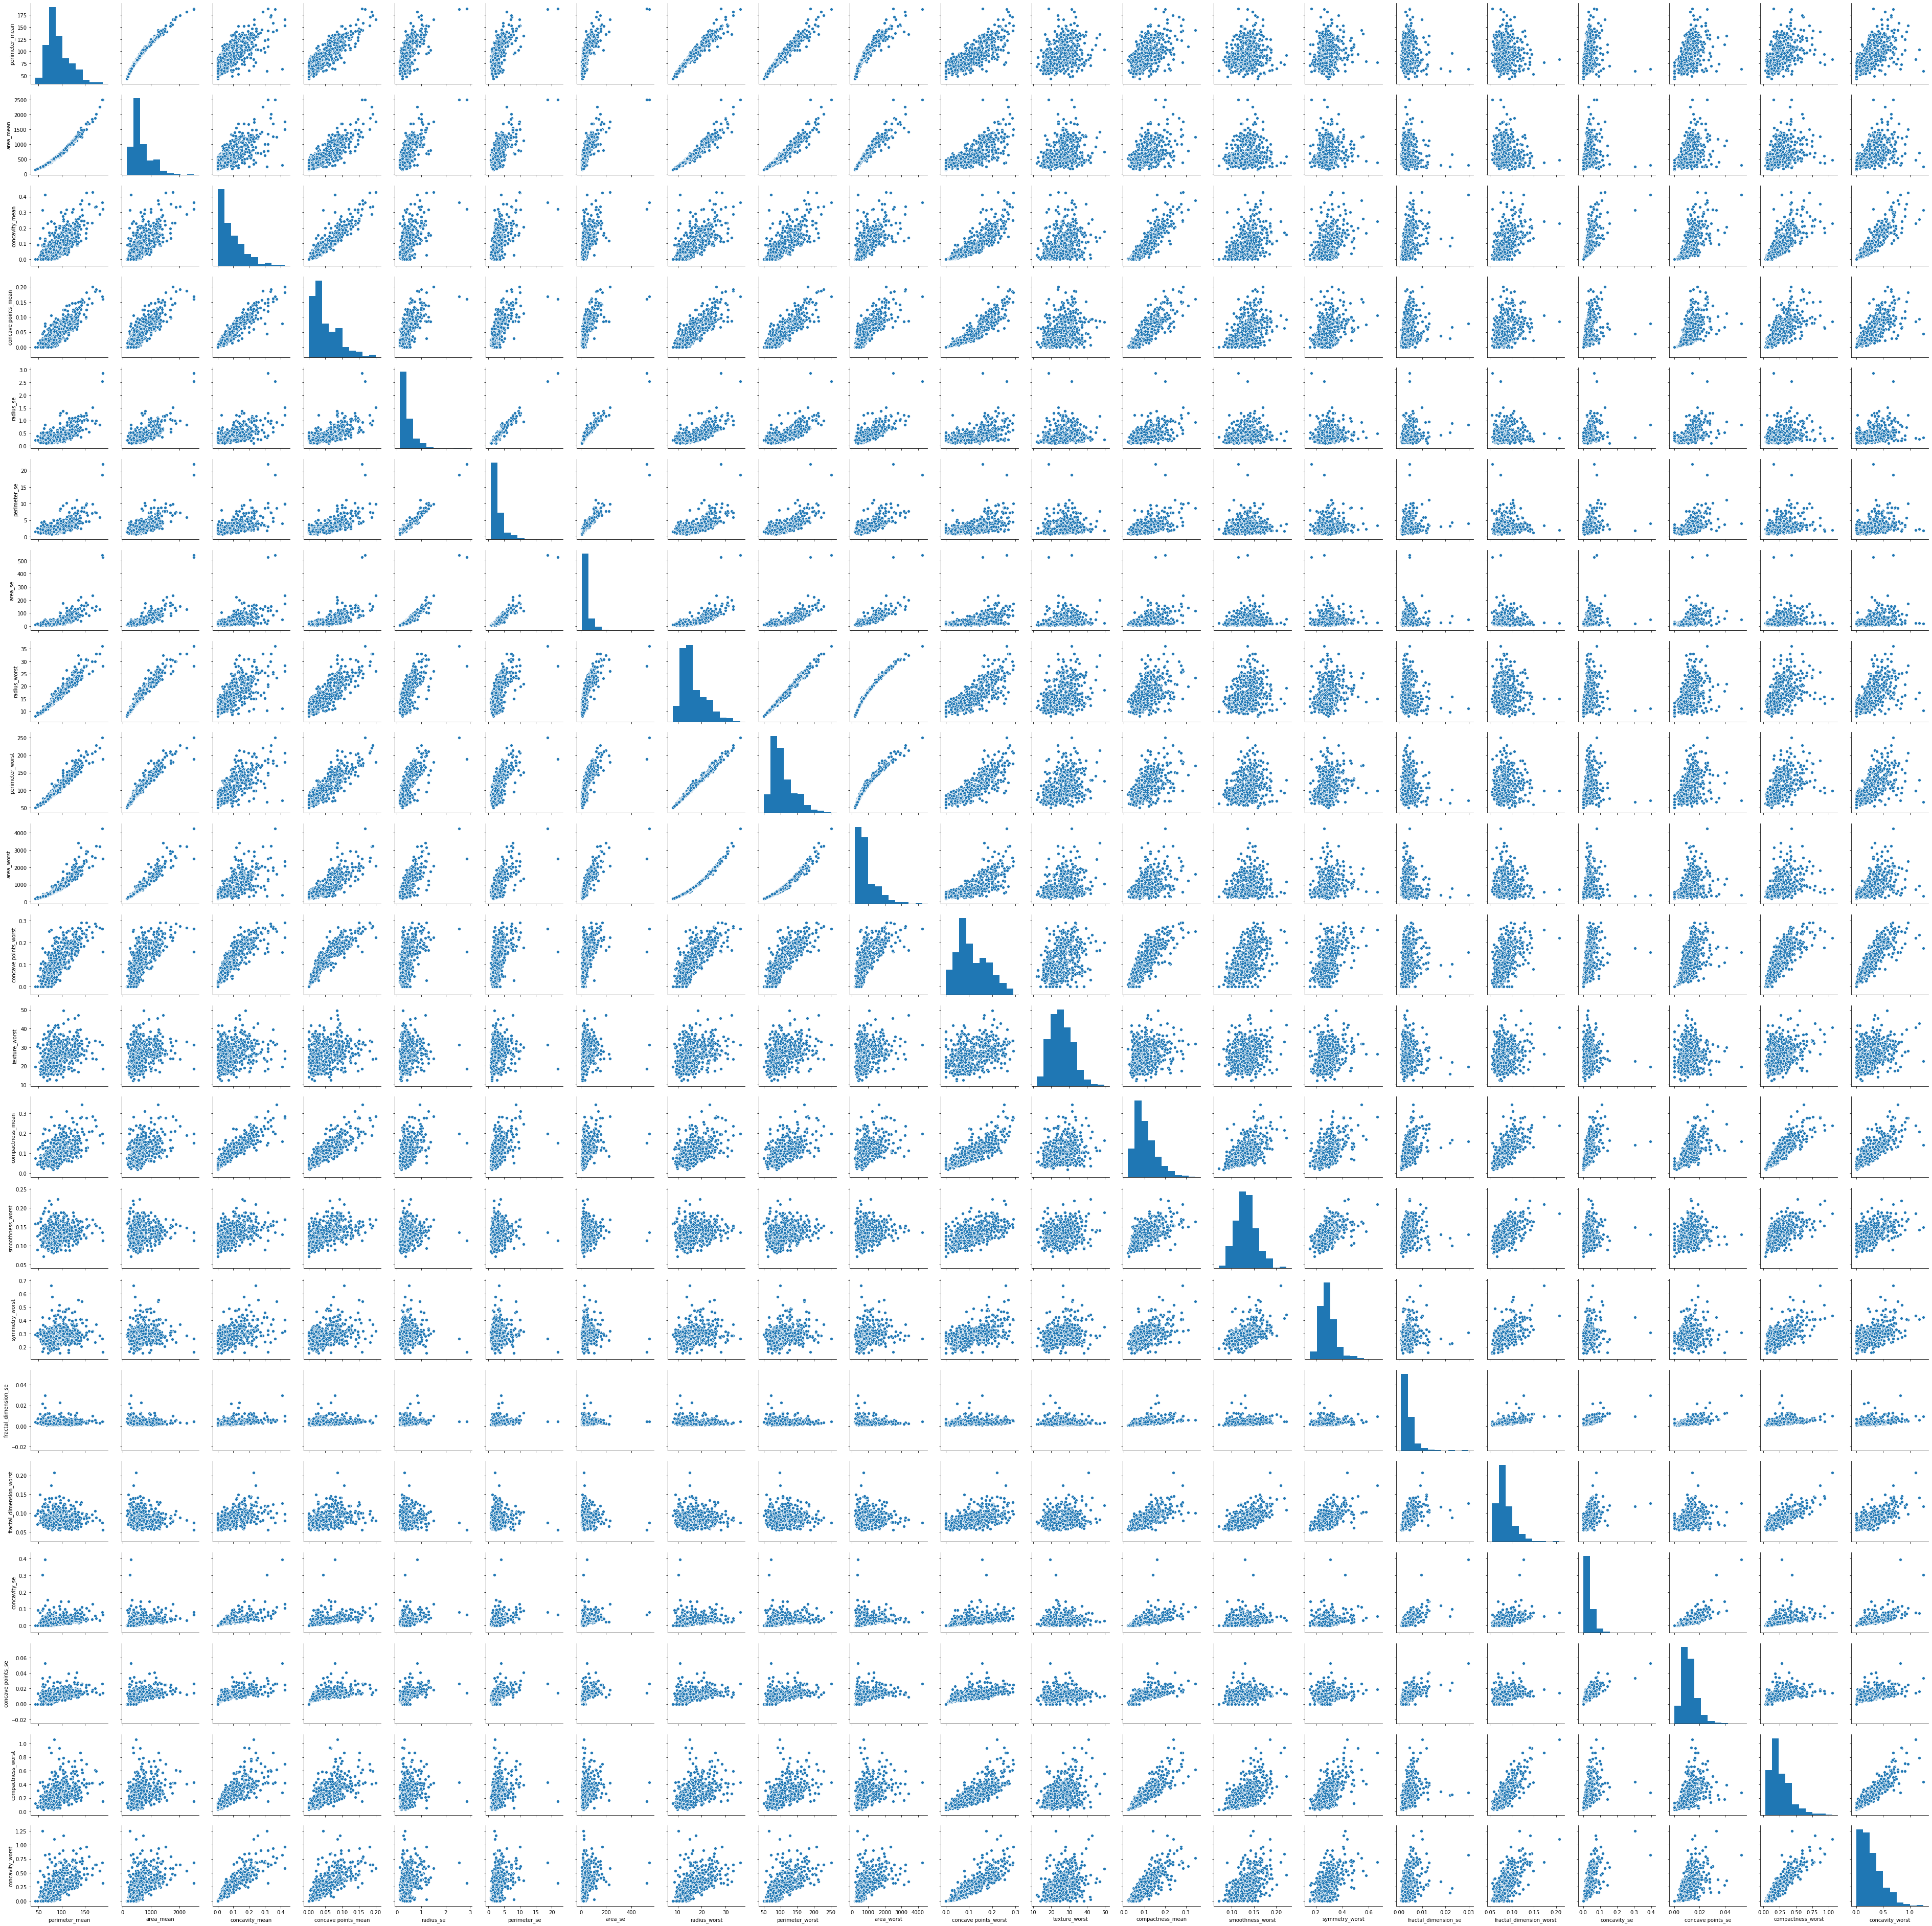

In [18]:
#Draw paired correlation graphs
sns.pairplot(df[CorField])

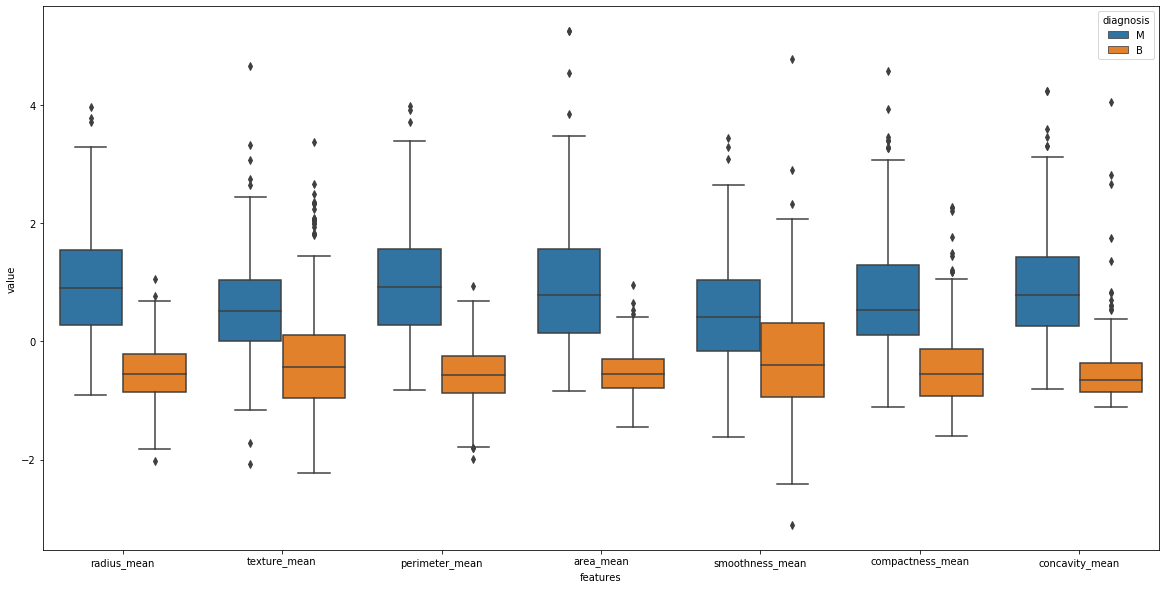

In [19]:
# Plot BoxPlots [0:7]
dataVar = pd.concat([tarVar.diagnosis,dataNorm.iloc[:,0:7]],axis=1)
dataVar = pd.melt(dataVar,id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(20,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=dataVar)

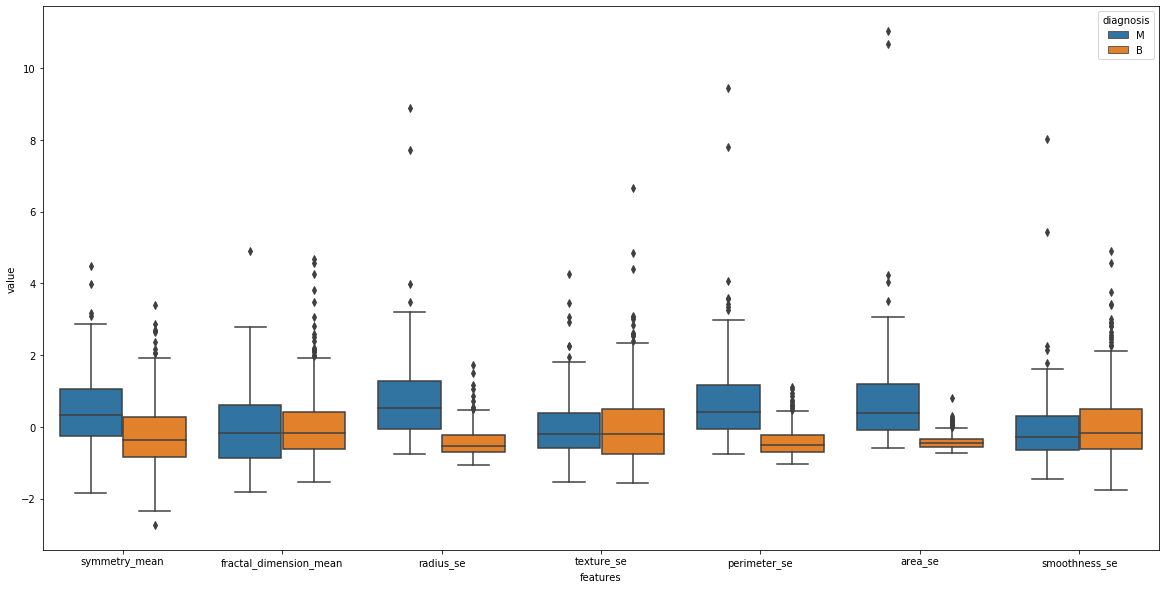

In [20]:
# Plot BoxPlots [8:15]
dataVar = pd.concat([tarVar.diagnosis,dataNorm.iloc[:,8: 15]],axis=1)
dataVar = pd.melt(dataVar,id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(20,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=dataVar)

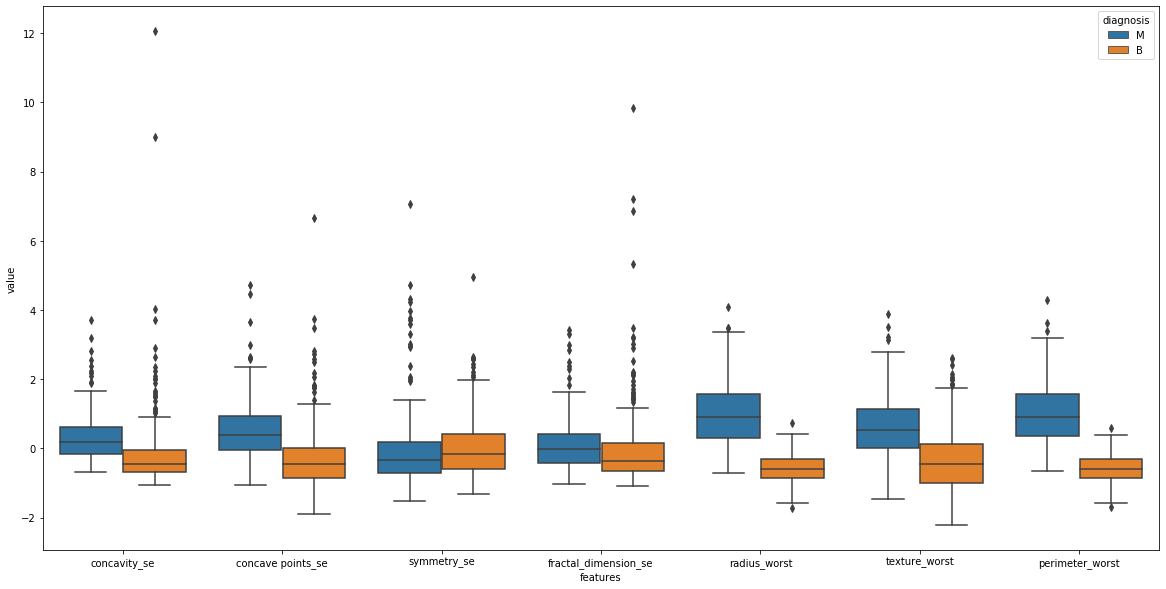

In [21]:
# Plot BoxPlots [16:23]
dataVar = pd.concat([tarVar.diagnosis,dataNorm.iloc[:,16: 23]],axis=1)
dataVar = pd.melt(dataVar,id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(20,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=dataVar)

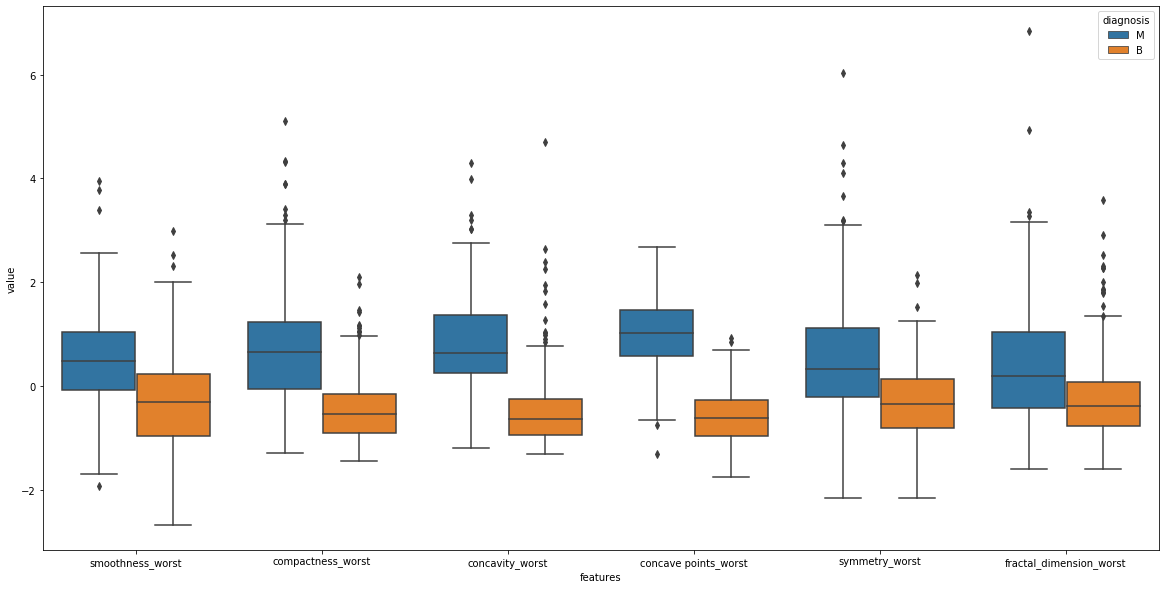

In [22]:
# Plot BoxPlots [24:31]
dataVar = pd.concat([tarVar.diagnosis,dataNorm.iloc[:,24: 31]],axis=1)
dataVar = pd.melt(dataVar,id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(20,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=dataVar)

In [23]:
# Comparison of median columns with high correlation
dataVar = pd.concat([tarVar.diagnosis,dataNorm.iloc[:,0: 31]],axis=1)
df_group_one = dataVar[['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst', 'diagnosis']]
df_group_one = df_group_one.groupby('diagnosis').agg(np.mean)
df_group_one
print('Median Differense\n', df_group_one.diff().max())
print(' concave points_worst have max Differense')

Median Differense
 radius_mean             1.508579
perimeter_mean          1.534631
area_mean               1.465091
concavity_mean          1.439004
concave points_mean     1.604846
radius_se               1.171963
perimeter_se            1.149246
area_se                 1.132911
radius_worst            1.604515
perimeter_worst         1.617865
area_worst              1.516424
concave points_worst    1.639877
dtype: float64
 concave points_worst have max Differense


In [24]:
# The best signs for learning
#These features are linearly independent and have good statistical characteristics.
best_signs = ['concave points_worst', 'compactness_mean', 'concavity_worst', 'concave points_worst', 'compactness_worst']
df[best_signs].describe(percentiles = [0.1, 0.25, 0.75, 0.9])

concave points_worst  compactness_mean  concavity_worst  \
count            569.000000        569.000000       569.000000   
mean               0.114606          0.104341         0.272188   
std                0.065732          0.052813         0.208624   
min                0.000000          0.019380         0.000000   
10%                0.038460          0.049700         0.045652   
25%                0.064930          0.064920         0.114500   
50%                0.099930          0.092630         0.226700   
75%                0.161400          0.130400         0.382900   
90%                0.208940          0.175460         0.571320   
max                0.291000          0.345400         1.252000   

       concave points_worst  compactness_worst  
count            569.000000         569.000000  
mean               0.114606           0.254265  
std                0.065732           0.157336  
min                0.000000           0.027290  
10%                0.038460           0.093676  
25%                0.064930           0.147200  
50%                0.099930           0.211900  
75%                0.161400           0.339100  
90%                0.208940           0.447840  
max                0.291000           1.058000